In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
data = pd.read_excel('C:/Users/DND/Downloads/1729258-1613615-Stock_Price_data_set_(1).xlsx')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB
None


In [4]:
data["Date"] = data["Date"].astype("int64")

In [5]:
corr = data.corr()
print(corr)

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.840554  0.841665  0.840878  0.841384   0.841384   
Open       0.840554  1.000000  0.998605  0.998508  0.996812   0.996812   
High       0.841665  0.998605  1.000000  0.998203  0.998551   0.998551   
Low        0.840878  0.998508  0.998203  1.000000  0.998544   0.998544   
Close      0.841384  0.996812  0.998551  0.998544  1.000000   1.000000   
Adj Close  0.841384  0.996812  0.998551  0.998544  1.000000   1.000000   
Volume    -0.427661 -0.415838 -0.400699 -0.432116 -0.413362  -0.413362   

             Volume  
Date      -0.427661  
Open      -0.415838  
High      -0.400699  
Low       -0.432116  
Close     -0.413362  
Adj Close -0.413362  
Volume     1.000000  


In [6]:
from yellowbrick.target import FeatureCorrelation

In [7]:
feature_names = ['Date','Open', 'High', 'Low', 'Close','Adj Close'] 
X, y = data[feature_names], data['Volume']
features = np.array(feature_names)

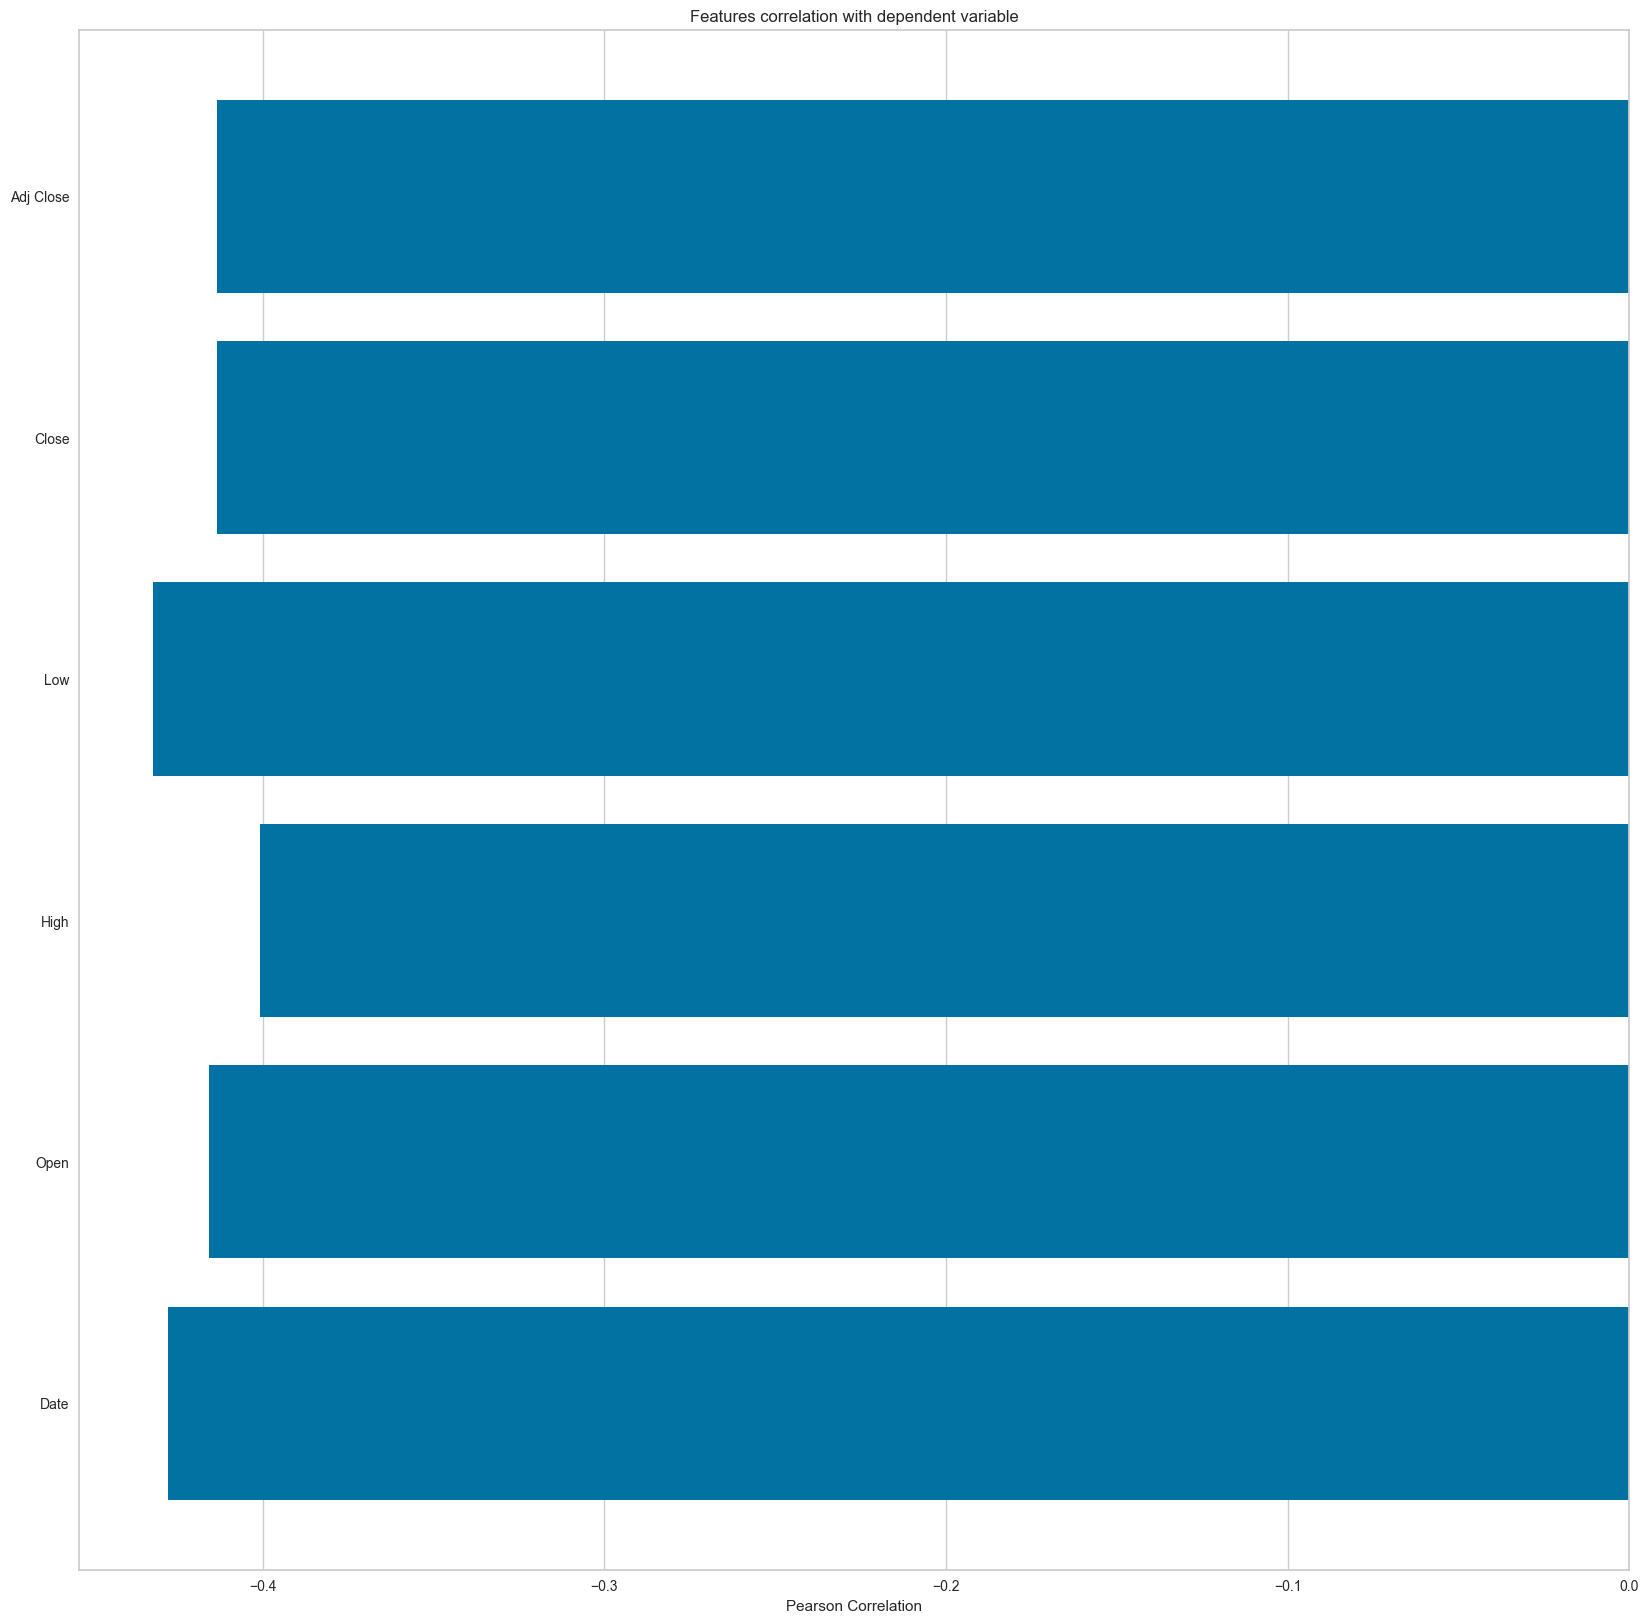

<AxesSubplot: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [8]:
import matplotlib.pyplot as plt
visualizer = FeatureCorrelation(labels=features)
plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     
visualizer.show()

In [9]:
avg = data[["Open","High","Low","Close"]].mean(axis=1)
print(avg.info())

<class 'pandas.core.series.Series'>
RangeIndex: 1009 entries, 0 to 1008
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1009 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB
None


In [10]:
data['average'] = avg

In [13]:
slope, intercept, r, p, std_err = stats.linregress(data['average'], data['Volume'])
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, data['average']))

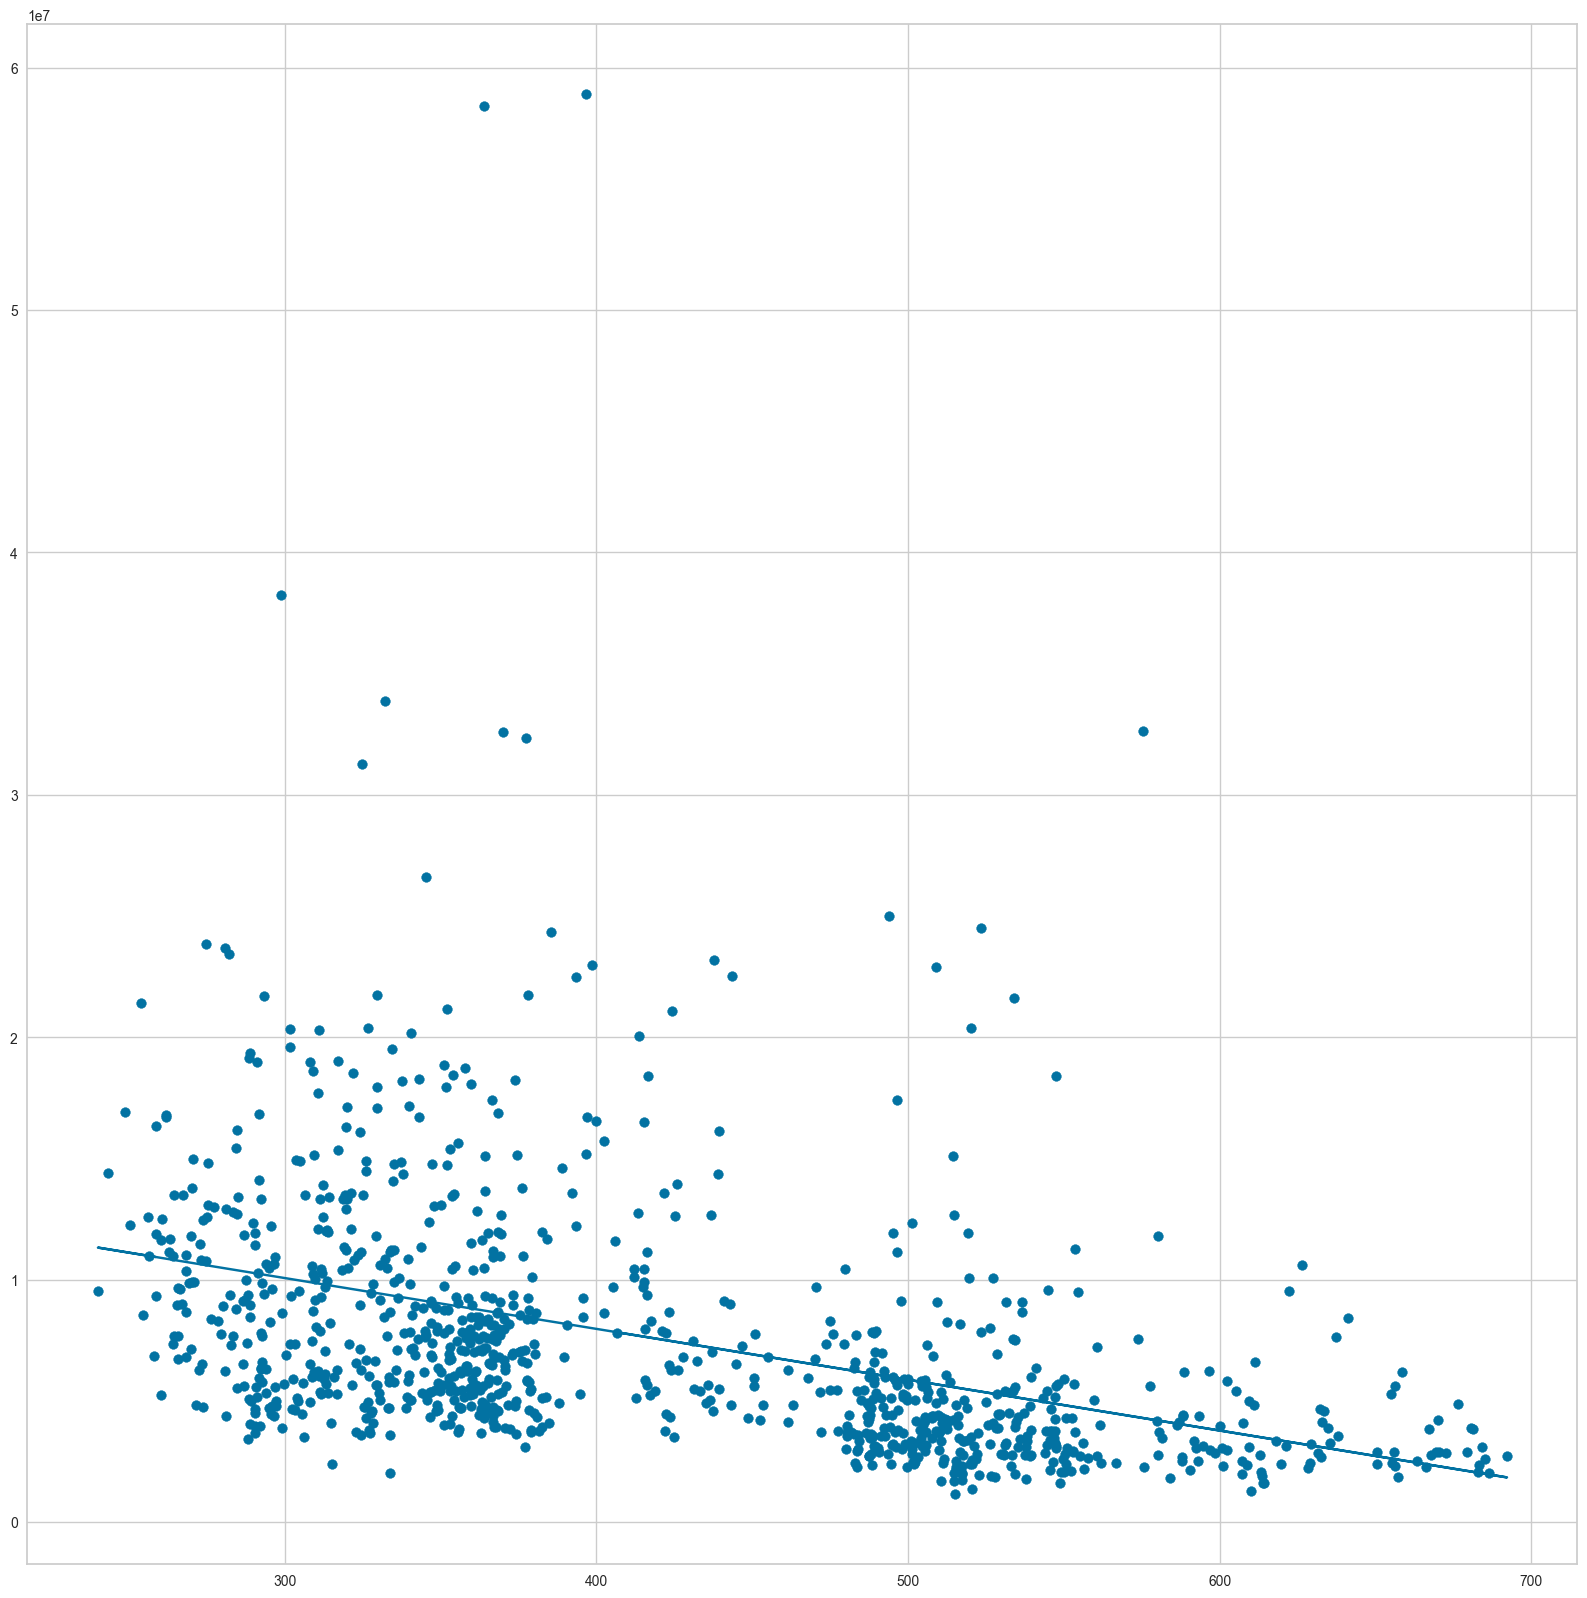

In [14]:
plt.scatter(data['average'], data['Volume'])
plt.plot(data['average'], mymodel)
plt.show()